In [1]:
#installing dependencies 
import networkx as nx  #network python library 
import matplotlib.pyplot as plt #visualization python library
from csv import reader #reading CSV files 
import pandas as pd #spreadsheets python library

In [ ]:
#Input file with one record per chat collaboration
csv = "/content/tachyhealth graph theory.csv"

#Data frame 
pairs = pd.DataFrame(columns=['First', 'Second', 'Count'])

#Read file and extract pairs and weights
with open(csv, 'r', encoding="utf-8-sig") as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        
        row.sort()
        #sort and filter for only valid names
        filtered_row = [ emp for emp in row
                        if len(emp) > 0] 

        #Generate pairs
        
        #Iterate for the first 
        for i in range(0, len(filtered_row)-1):
            #Iterate for the second 
            for j in range(i+1,len(filtered_row) ):
            
                first=filtered_row[i]
                second=filtered_row[j]

                #Create the pair record. If Dataframe record already exists
                #Update the count. If not, create it
                curr_rec = pairs[
                                (pairs['First'] == first )
                                & (pairs['Second'] == second)]

                if ( curr_rec.empty) :
                    new_df = pd.DataFrame([{'First': first,
                                            'Second' : second,
                                            'Count':1}])
                    pairs=pairs.append(new_df,
                                                         ignore_index=True)

                else:
                    curr_rec.at[curr_rec.index[0],'Count'] = curr_rec.at[curr_rec.index[0],'Count'] + 1
                    pairs.update(curr_rec)
                
print(pairs)

<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-

                              First                           Second Count
0                           Tavanic       covid associated pneumonia     1
1        covid associated pneumonia                         solupred    20
2        covid associated pneumonia                        not valid     1
3                         not valid                         solupred     1
4                            asprin       covid associated pneumonia    12
5                            asprin                          panadol     4
6                            asprin                         solupred    12
7        covid associated pneumonia                          panadol     7
8                           panadol                         solupred     6
9                            asprin                            vit c     2
10       covid associated pneumonia                            vit c     2
11                          panadol                            vit c     1
12                       

<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,
<ipython-input-2-85ab39551f2a>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs=pairs.append(new_df,


In [ ]:
pairs.to_excel("output.xlsx")

In [ ]:
#Create a network  graph using NetworkX python library f
graph_emps  = nx.Graph( )

#Add Edges based on the dataframe (nodes gets added automatically)
for i,row in pairs.iterrows():
    graph_emps.add_edge(row['First'],  
                        row['Second'],   
                        weight=row['Count'])

# network summary
print("Network summary: \n----------------\n", nx.info(graph_emps))

Network summary: 
----------------
 Graph with 19 nodes and 33 edges


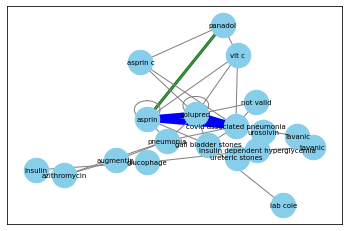

In [ ]:
# Create different types of edges based on their cohesion

#Pairs with Count > 8 for high cohesion
elarge = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] > 8]

#Pairs with Count between 4 and 5 for medium cohesion
emedium = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if  3 < data['weight'] <= 5]

#Pairs with Count less than 4 for low cohesion
esmall = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] <= 4]


pos = nx.kamada_kawai_layout(graph_emps)  # positions for all nodes

## Setup the Graph
# nodes
nx.draw_networkx_nodes(graph_emps, pos, 
                       node_size=600,
                       node_color='skyblue')


nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=elarge,
                       width=6,
                       edge_color='blue')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=emedium,
                       width=3,
                       edge_color='green')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=esmall,
                       width=1, 
                       edge_color='gray')

# labels
nx.draw_networkx_labels(graph_emps, 
                        pos, 
                        font_size=7, 
                        font_family='DejaVu Sans')






plt.axis()
plt.show()

In [ ]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)


#find number of nodes they are connected with
print("\ :\n--------------------------------------------------------------")
print(nx.degree(graph_emps,'__'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n---------------------------------------------------------------------")
sort_dict(nx.clustering(graph_emps,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
sort_dict(nx.degree_centrality(graph_emps))

print("\nBetweenness:\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
sort_dict(nx.betweenness_centrality(graph_emps))

\ :
--------------------------------------------------------------
[]

Clustering Co-efficient:
---------------------------------------------------------------------
panadol  =  0.1797163375953491
asprin c  =  0.1704992915425708
vit c  =  0.16464763865677629
insulin  =  0.15182944859378314
glucophage  =  0.1518294485937831
asprin  =  0.12455823987602492
solupred  =  0.11640188516274912
covid associated pneumonia  =  0.09020669267209834
fatma  =  0.08577728822340196
augmentin  =  0.07211247851537042
azithromycin  =  0.07211247851537042
gall bladder stones  =  0.06077728822340195
insulin dependent hyperglycemia  =  0.05060981619792771
pneumonia  =  0.03911841385705214
Tavanic  =  0
tavanic  =  0
lab cole  =  0
ureteric stones  =  0
urosolvin  =  0

Centrality :
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
solupred  =  0.5555555555555556
covid associated pneumonia  =  0.5
asprin  =  0.5
pneumonia  =  0.3333333333333333
panadol  =  0.2777777777777778
v

In [ ]:
###################################################################
new trial
##################################################################

In [ ]:
!pip install msticpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 802 kB 30.3 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 62.5 MB/s 
     |████████████████████████████████| 12.2 MB 47.8 MB/s 
     |████████████████████████████████| 761 kB 58.6 MB/s 
     |████████████████████████████████| 238 kB 54.3 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 135 kB 91.3 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 172 kB 61.9 MB/s 
     |████████████████████████████████| 40 kB 3.5 MB/s 
     |████████████████████████████████| 90 kB 7.5 MB/s 
     |████████████████████████████████| 85 kB 1.4 MB/s 
     |████████████████████████████████| 330 kB 111.9 MB/s 
     |████████████████████████████████| 140 kB 69.8 MB/s 
     |████████████████████████████████| 6

In [ ]:
!pip install --upgrade msticpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import msticpy as mp

In [ ]:
from msticpy.vis.data_viewer import DataViewer


This product includes GeoLite2 data created by MaxMind, available from
https://www.maxmind.com.



In [ ]:
df = pd.read_csv("/content/tachyhealth graph theory - Copy.csv")

In [ ]:
df.head(5)

,A,B,C,D,E,F
0,covid associated pneumonia,Tavanic,NaN,NaN,NaN,NaN
1,covid associated pneumonia,solupred,NaN,NaN,NaN,NaN
2,covid associated pneumonia,solupred,not valid,NaN,NaN,NaN
3,covid associated pneumonia,solupred,NaN,NaN,NaN,NaN
4,covid associated pneumonia,solupred,NaN,NaN,NaN,NaN


In [ ]:
df.mp_plot.network(
    source_col="A",
    target_col="B",
    target_attrs=["A"],
    source_attrs=["B"],
    edge_attrs=["A","B"]
)

Figure(id='2476', ...)

In [ ]:
df = pd.read_excel("/content/output.xlsx")
df.head(3)

,Unnamed: 0,First,Second,Count
0,0,Tavanic,covid associated pneumonia,1
1,1,covid associated pneumonia,solupred,20
2,2,covid associated pneumonia,not valid,1


In [ ]:
df.mp_plot.network(
    source_col="First",
    target_col="Second",
    target_attrs=["First"],
    source_attrs=["Count"],
    edge_attrs=["Count"]
)

Figure(id='1261', ...)

In [ ]:
#third trial

In [ ]:
!pip install d3blocks

In [ ]:
!pip install d3graph

In [15]:
import d3graph

In [17]:
from d3graph import d3graph

In [2]:
import d3blocks

In [ ]:
# Import
!pip install hnet

In [11]:
import hnet as hn

In [5]:
from hnet import hnet

In [11]:
!pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hnet 1.1.13 requires d3graph==1.0.3, but you have d3graph 2.3.7 which is incompatible.


In [9]:
# Import bnlearn
!pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import bnlearn as bn

In [9]:
df = pd.read_csv("/content/tachyhealth graph theory - Copy.csv")

In [19]:
from d3graph import d3graph
size = [10, 20, 10, 10, 15, 10, 5]

# Initialize
d3 = d3graph()
# Load example
adjmat, _ = d3.import_example('bigbang')
# Process adjmat
d3.graph(adjmat)
# Show
d3.show()

[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 7
[d3blocks] >INFO> Slider range is set to [1, 5]
[d3blocks] >INFO> Write to path: [/tmp/tmpuu8p243e/d3graph.html]


In [ ]:
from IPython.display import IFrame
IFrame(src='/tmp/tmpuu8p243e/d3graph.html', width=900, height=600)

In [37]:
%%writefile script.js
document.body.append(document.createTextNode('Script result!'))

Writing script.js


In [42]:
%%html
<script src=/tmp/tmpuu8p243e/d3graph.html></script>
<b>html</b>

In [41]:
%%html
<img src=/tmp/tmpuu8p243e/d3graph.html>